In [76]:
import csv
from pathlib import Path

import numpy as np
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import DataStructs
from rdkit.SimDivFilters import MaxMinPicker
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme("poster", "white")

In [77]:
p_top_1k = Path("../data/2_molpal/6p9l_hts_results/smis-top1k.filtered.txt")
smis = p_top_1k.read_text().splitlines()
mols = [Chem.MolFromSmiles(smi) for smi in smis]

length = 1024
radius = 2

fps = [
    Chem.GetMorganFingerprintAsBitVect(mol, nBits=length, radius=radius, useChirality=True)
    for mol in mols
]
X = np.empty((len(mols), length), int)
_ = [DataStructs.ConvertToNumpyArray(fp, x) for fp, x in zip(fps, X)]

In [50]:
pca = PCA(2)
X_r = pca.fit_transform(X)

In [69]:
clusterer = KMeans(20)
labels_kmeans = clusterer.fit_predict(X)

/opt/homebrew/Caskroom/miniconda/base/envs/doce/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


([], [])

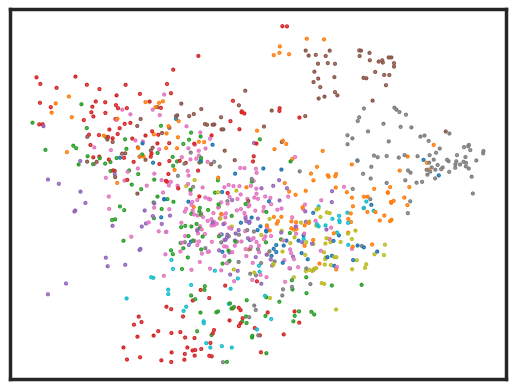

In [75]:
plt.scatter(X_r[:,0], X_r[:, 1], 1, labels_kmeans, cmap="tab10")
plt.xticks([])
plt.yticks([])

In [81]:
with open(p_top_1k.with_suffix(".clustered.csv"), "w") as f:
    writer = csv.writer(f)
    writer.writerow(["smiles", "cluster"])
    writer.writerows(sorted(zip(smis, labels_kmeans), key=lambda xy: xy[1]))

In [107]:
with open("../data/2_molpal/6p9l_hts_results/smis-top1k.filtered.clustered.csv") as f:
    reader = csv.reader(f)
    next(reader)
    smis, labels = zip(*reader)

labels = np.array(list(map(int, labels)))
idxs = np.arange(len(labels))
N = labels.max()

idxs = [np.random.choice(idxs[labels == i], 1) for i in range(N)]
idxs = np.concatenate(idxs)

selected = [smis[i] for i in idxs]
selected

['O=C(c1ccc(F)cc1)N1CCN(Cc2nc3sc4c(c3c(=O)[nH]2)CCCC4)CC1',
 'O=C(Nc1nc(-c2cc(F)ccc2F)cs1)c1ccccc1Oc1ccccc1',
 'O=C(NCc1ccc(NC(=O)C2CC2)cc1)C1CCN(C(=O)c2cccc3ccccc23)CC1',
 'Fc1ccc(-c2nnc(Oc3ccc(Oc4ccccc4)cc3)c3ccccc23)cc1',
 'O=C(Cc1cn(-c2ccccc2)nc1-c1ccc(Cl)cc1)Nc1ccc2c(c1)NC(=O)CO2',
 'O=C(O)c1cc(-c2ccc(-c3ccc(F)cc3)o2)nc2cc3c(cc12)OCCO3',
 'CC1(c2ccc3ccccc3c2)NC(=O)N(CC(=O)N(Cc2ccccc2)Cc2ccccc2)C1=O',
 'O=S(=O)(C1=Cc2ccccc2CC1)N1CCN(S(=O)(=O)C2=Cc3ccccc3CC2)CC1',
 'Cc1ccc(N2C(=O)C(=CNc3ccc4c(c3)C(=O)c3ccccc3C4=O)c3ccccc3C2=O)c(C)c1',
 'O=C(CCc1nc2c(cnn2-c2ccccc2)c(=O)[nH]1)N1CCCC1c1ccc2c(c1)OCCCO2',
 'O=C1OC(c2ccccc2)Cc2cc(C(=O)N3CCCSc4ccccc43)ccc21',
 'O=C(NCc1ccc(C(=O)N2CCOCC2)cc1)c1cc(-c2ccc(F)cc2)nc2ccccc12',
 'O=C(Cn1c(=O)oc2cc(Cl)ccc21)N1c2ccccc2OCC1c1ccccc1',
 'O=C(Nc1ccc2c(c1)CCC2)c1cccc(S(=O)(=O)Nc2ccccc2-c2ccccc2)c1',
 'Cc1cccc(NC(=O)c2cc(-c3ccc(F)cc3)nc3ccccc23)n1',
 'O=C(c1oc2ccccc2c1-c1cnn(-c2ccccc2)c1)N1CCc2ccccc21',
 'O=C(Cn1c2ccccc2c(=O)c2ccccc21)NC(c1ccccc1)c1cc2cc